# Driver code

In [198]:
# !pip install -U ipympl

In [199]:
%matplotlib widget
%load_ext autoreload
%autoreload 2

import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from Raw_Data.bulk_and_open_system_model import get_plots_geometries, get_plots_3d
from sklearn.model_selection import train_test_split
import auxiliary_funcs as aux

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Getting geometries plots

In [200]:
# Constants
flat_band_on_off = 0
N_band = 2
N = 1
alfa = 0.6
Nx = 24
Ny = Nx
X, Y = np.meshgrid(np.arange(0, Nx, 1), np.arange(0, Ny, 1))
hopping_range = 4
dk = 0.1
kx_vec = np.arange(-np.pi, np.pi, dk)

**Figure 2.1**

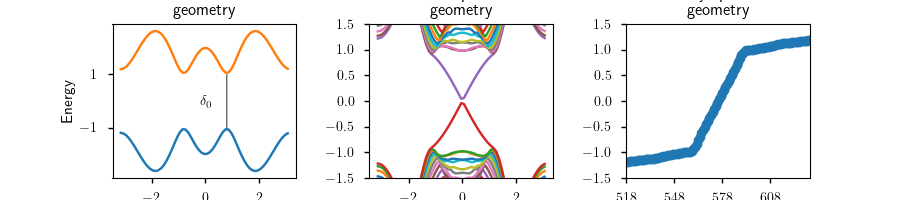

In [201]:
# mu and line_len can be modified to get figures from the tutorial
mu = -2
line_len = [0.8, -1.1, 0, 2.1]
parameters = np.array([N, mu, alfa, flat_band_on_off])
# Uncomment below for beautiful plot, but not scientifically accuarate :)
# with plt.xkcd():
get_plots_geometries(Nx, Ny, hopping_range, N, flat_band_on_off, mu, alfa, line_len, parameters, dk, N_band)

**Figure 2.2**

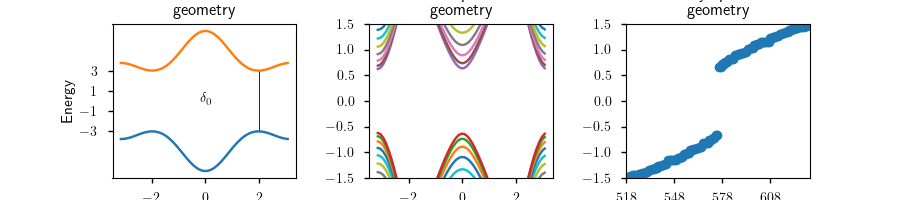

In [202]:
# mu and line_len can be modified to get figures from the tutorial
mu = 3
line_len = [2, -3, 0, 6]
parameters = np.array([N, mu, alfa, flat_band_on_off])
# Uncomment below for beautiful plot, but not scientifically accuarate :)
# with plt.xkcd():
get_plots_geometries(Nx, Ny, hopping_range, N, flat_band_on_off, mu, alfa, line_len, parameters, dk, N_band)

**Plot 3**

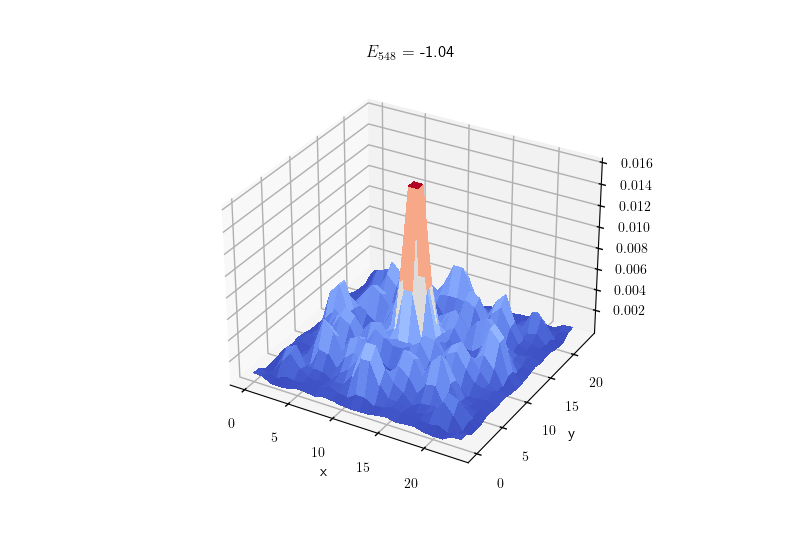

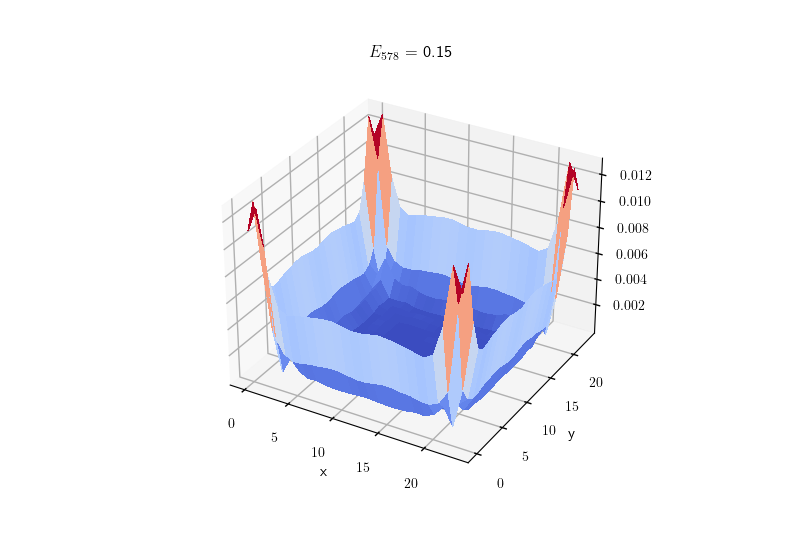

In [203]:
mu = -2
line_len = [0.8, -1.1, 0, 2.1]
parameters = np.array([N, mu, alfa, flat_band_on_off])
get_plots_3d(Nx, Ny, hopping_range, parameters, X, Y)

## Getting data from Pandas and EDA

Reading data saved prevously

In [204]:
output = pd.read_pickle("Raw_Data/pandas_data_set_Shiba_data.pkl")

In [205]:
output.shape

(85570, 13)

We print first 20 rows of the DataFrame to get a sense of what can we encounter there

In [206]:
output.head(20)

,Nx,N,seed,energy_window,mu,alpha,gap_clean,v_sample,Chern_bulk,Chern_marker_clean,Chern_marker_disorder,number_of_states,LDOS
0,24.0,1.0,1.0,0.1,3.667,0.644,2.1947,0.0,0.0,0.0,0.000,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,24.0,1.0,2.0,0.1,3.667,0.644,2.1947,0.1,0.0,0.0,0.000,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,24.0,1.0,3.0,0.1,3.667,0.644,2.1947,0.2,0.0,0.0,0.000,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,24.0,1.0,4.0,0.1,3.667,0.644,2.1947,0.3,0.0,0.0,0.000,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,24.0,1.0,5.0,0.1,3.667,0.644,2.1947,0.4,0.0,0.0,0.000,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
5,24.0,1.0,6.0,0.1,3.667,0.644,2.1947,0.5,0.0,0.0,0.000,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
6,24.0,1.0,7.0,0.1,3.667,0.644,2.1947,0.6,0.0,0.0,0.000,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
7,24.0,1.0,8.0,0.1,3.667,0.644,2.1947,0.7,0.0,0.0,0.000,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
8,24.0,1.0,9.0,0.1,3.667,0.644,2.1947,0.8,0.0,0.0,0.000,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
9,24.0,1.0,10.0,0.1,3.667,0.644,2.1947,0.9,0.0,0.0,0.001,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


We can see that even though the bulk chern marker groups have even counts, their dispersions are not even. Group with bulk chern marker 2 is much more dispersed than the other three. We may have slight suspisions that it might be the hardest to spot for the NN later on.

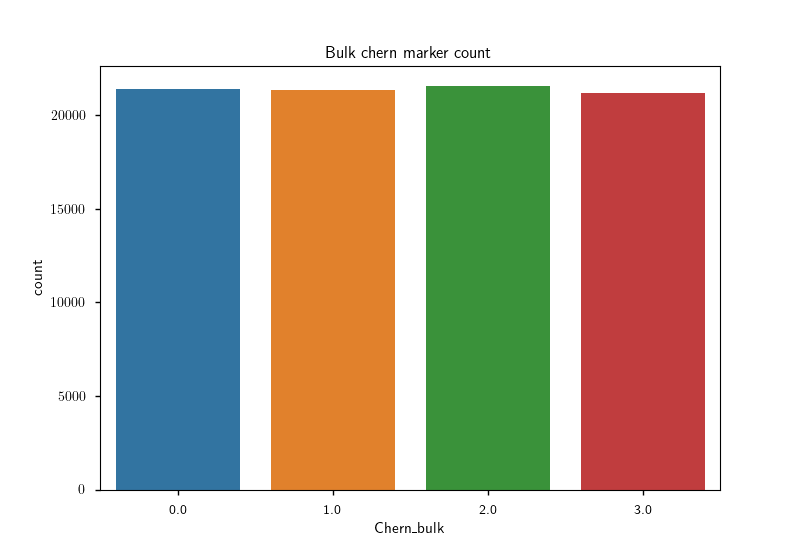

In [207]:
plt.figure()
plt.title("Bulk chern marker count")
sns.countplot(x=output["Chern_bulk"])
plt.show()

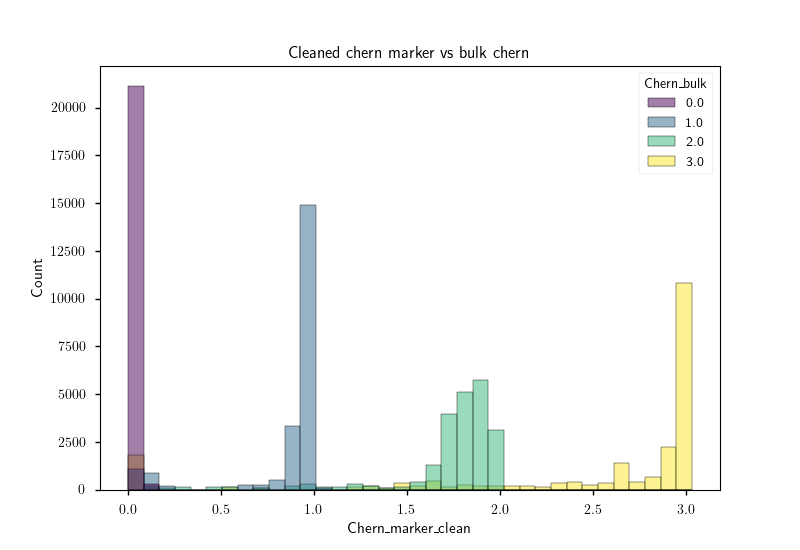

In [208]:
plt.figure()
plt.title("Cleaned chern marker vs bulk chern")
sns.histplot(output, x="Chern_marker_clean", hue="Chern_bulk", palette=plt.cm.viridis)
plt.show()

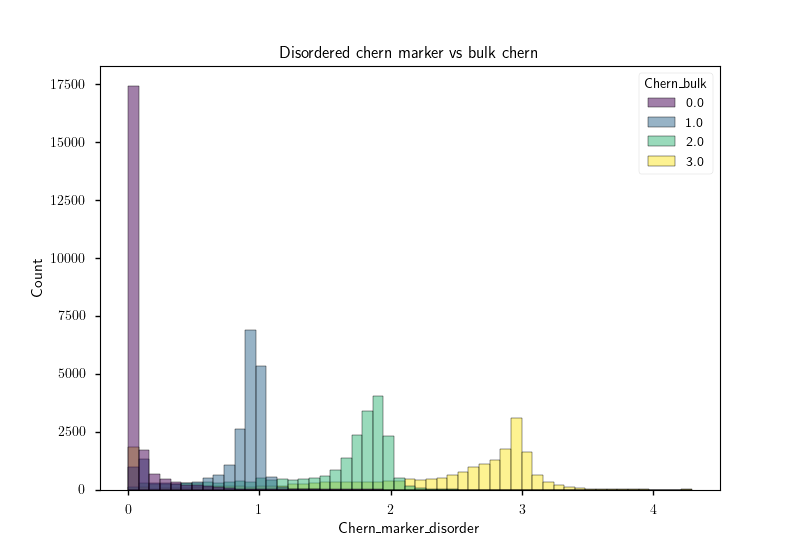

In [209]:
plt.figure()
plt.title("Disordered chern marker vs bulk chern")
sns.histplot(output, x="Chern_marker_disorder", hue="Chern_bulk", palette=plt.cm.viridis)
plt.show()


We set *train* and *test* data sets by train-test-split from sklearn's model selection module with shuffle option enabled
*test* dataset size will be 20% of the raw dataset. Train dataset will be further processed for fine-tuning the model, while the test dataset will be left as is.

In [210]:
test_proc = 0.1
X_train, X_test = train_test_split(output, test_size=test_proc, shuffle=True)
print("Shape of the raw data is ", output.shape)
print("Shape of the train data is ", X_train.shape, ", and of the test data ", X_test.shape)

Shape of the raw data is  (85570, 13)
Shape of the train data is  (77013, 13) , and of the test data  (8557, 13)


Now we would like to make our train data linearly separable for the NN, so we transfrom them the way to eliminate the overlaps seen on the plot above

Here we can see that after first step of normalization (setting $V_0 < 1$) we already went down from $68456$ samples to $\sim 32600$ samples (exact number varies due to shuffling done during split)

In [211]:
X_train = X_train.loc[X_train["v_sample"] < 1]
X_train.reset_index(drop=True, inplace=True)
X_train.shape

(36647, 13)

In [212]:
X_train.head(30)

,Nx,N,seed,energy_window,mu,alpha,gap_clean,v_sample,Chern_bulk,Chern_marker_clean,Chern_marker_disorder,number_of_states,LDOS
0,24.0,3.0,52615.0,0.1,-2.000,0.683,1.0667,0.9,3.0,2.955,2.710,4.0,"[0.014080441346131909, 0.0138770152226881, 0.0..."
1,24.0,3.0,55232.0,0.1,2.000,0.169,1.3000,0.1,3.0,2.938,2.920,6.0,"[0.004954387197038364, 0.007372569612998318, 0..."
2,24.0,1.0,5047.0,0.1,3.667,0.050,0.1333,0.6,0.0,0.040,0.042,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,24.0,1.0,48010.0,0.1,-0.667,0.921,1.9501,0.3,2.0,1.769,1.828,12.0,"[0.016614082200412387, 0.017610819138763348, 0..."
4,24.0,1.0,14326.0,0.1,2.000,0.169,1.3000,0.3,1.0,1.000,1.008,4.0,"[0.014126301598213872, 0.013185936065131496, 0..."
5,24.0,3.0,61664.0,0.1,-3.000,0.367,1.4724,0.7,3.0,2.803,2.929,6.0,"[0.004895400309703654, 0.005233605318763498, 0..."
6,24.0,1.0,9480.0,0.1,2.000,0.644,1.0093,0.8,2.0,1.954,1.919,6.0,"[0.004041314985442777, 0.00931127970462948, 0...."
7,24.0,1.0,50804.0,0.1,2.000,0.525,0.2336,0.4,2.0,0.729,0.758,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
8,24.0,3.0,68342.0,0.1,-2.000,0.050,2.0044,0.7,3.0,2.992,2.936,12.0,"[0.006349243112844477, 0.01700565020314543, 0...."
9,24.0,3.0,65129.0,0.1,4.000,0.406,4.7535,0.7,0.0,0.000,0.002,26.0,"[1.6805009809177765e-05, 8.534012331335654e-06..."


Now let's apply second normalization condition, that is $|C - C_m| < 0.5$

In [213]:
X_train["|C-C_m|"] = X_train["Chern_bulk"] - X_train["Chern_marker_disorder"]

In [214]:
X_train.head(30)

,Nx,N,seed,energy_window,mu,alpha,gap_clean,v_sample,Chern_bulk,Chern_marker_clean,Chern_marker_disorder,number_of_states,LDOS,|C-C_m|
0,24.0,3.0,52615.0,0.1,-2.000,0.683,1.0667,0.9,3.0,2.955,2.710,4.0,"[0.014080441346131909, 0.0138770152226881, 0.0...",0.290
1,24.0,3.0,55232.0,0.1,2.000,0.169,1.3000,0.1,3.0,2.938,2.920,6.0,"[0.004954387197038364, 0.007372569612998318, 0...",0.080
2,24.0,1.0,5047.0,0.1,3.667,0.050,0.1333,0.6,0.0,0.040,0.042,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",-0.042
3,24.0,1.0,48010.0,0.1,-0.667,0.921,1.9501,0.3,2.0,1.769,1.828,12.0,"[0.016614082200412387, 0.017610819138763348, 0...",0.172
4,24.0,1.0,14326.0,0.1,2.000,0.169,1.3000,0.3,1.0,1.000,1.008,4.0,"[0.014126301598213872, 0.013185936065131496, 0...",-0.008
5,24.0,3.0,61664.0,0.1,-3.000,0.367,1.4724,0.7,3.0,2.803,2.929,6.0,"[0.004895400309703654, 0.005233605318763498, 0...",0.071
6,24.0,1.0,9480.0,0.1,2.000,0.644,1.0093,0.8,2.0,1.954,1.919,6.0,"[0.004041314985442777, 0.00931127970462948, 0....",0.081
7,24.0,1.0,50804.0,0.1,2.000,0.525,0.2336,0.4,2.0,0.729,0.758,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.242
8,24.0,3.0,68342.0,0.1,-2.000,0.050,2.0044,0.7,3.0,2.992,2.936,12.0,"[0.006349243112844477, 0.01700565020314543, 0....",0.064
9,24.0,3.0,65129.0,0.1,4.000,0.406,4.7535,0.7,0.0,0.000,0.002,26.0,"[1.6805009809177765e-05, 8.534012331335654e-06...",-0.002


In [215]:
X_train = X_train.loc[X_train["|C-C_m|"] < 0.5]
X_train.reset_index(drop=True, inplace=True)
X_train.shape

(32469, 14)

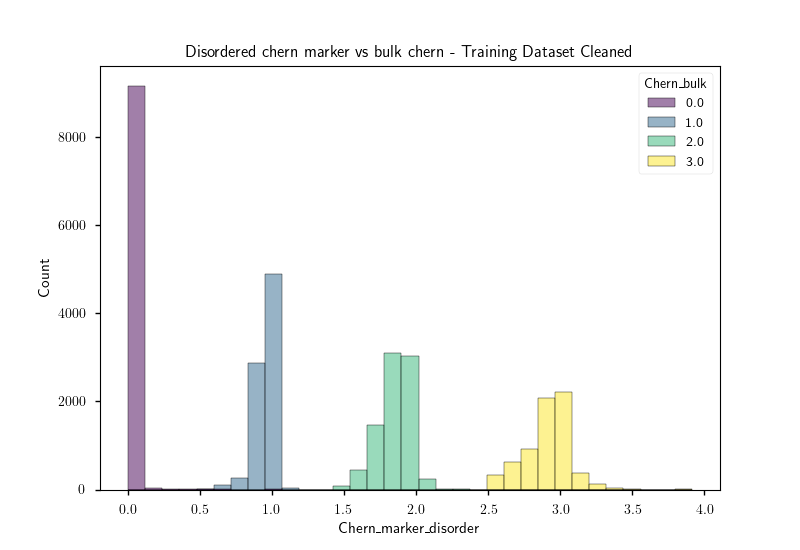

In [216]:
plt.figure()
plt.title("Disordered chern marker vs bulk chern - Training Dataset Cleaned")
sns.histplot(X_train, x="Chern_marker_disorder", hue="Chern_bulk", palette=plt.cm.viridis)
plt.show()

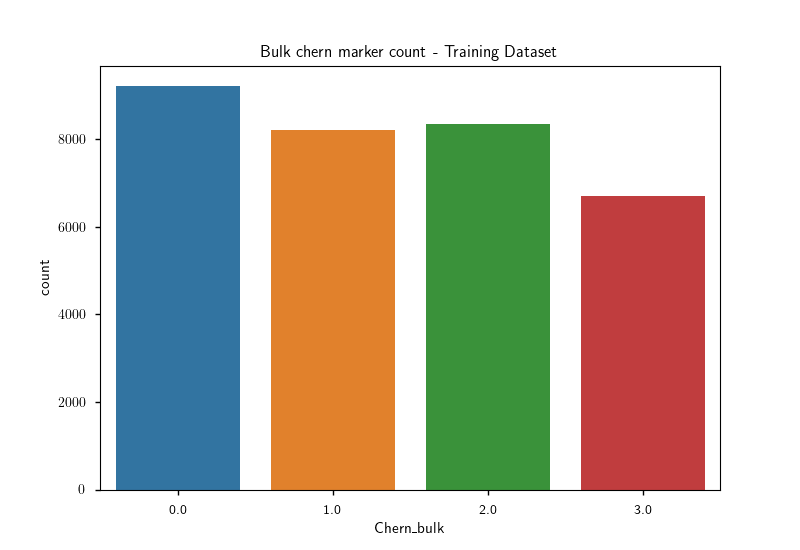

In [217]:
# Uncomment below for beautiful plot, but not scientifically accuarate :)
# with plt.xkcd():
plt.figure()
plt.title("Bulk chern marker count - Training Dataset")
sns.countplot(x=X_train["Chern_bulk"])
plt.show()

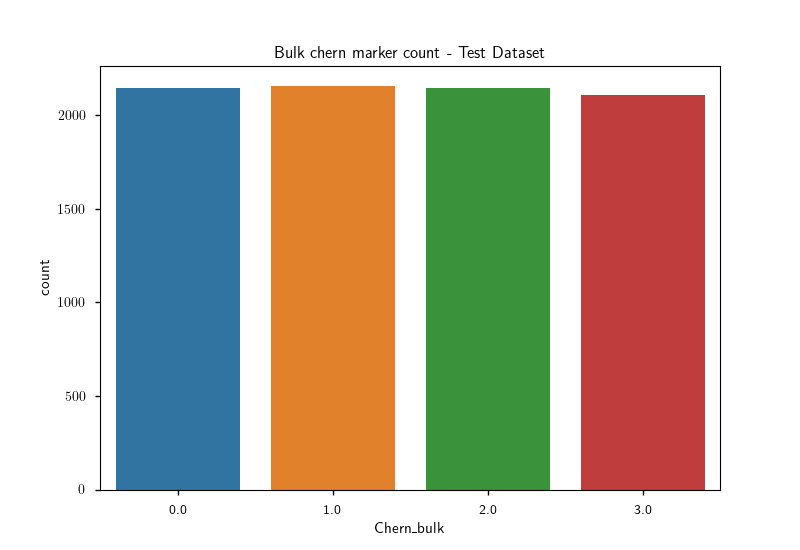

In [218]:
plt.figure()
plt.title("Bulk chern marker count - Test Dataset")
sns.countplot(x=X_test["Chern_bulk"])
plt.show()

After all the steps of data cleaning we are good to split it into *training dataset* and the *validation dataset* we will use to train our CNN. But first we need to drop all the unnecessary columns in both Training and Test dataset, as our CNN will be learning to recognise images (24x24 matrices) of LDOS, with *one-hot-encoded* Bulk Chern Numbers $|C_n|$ as labels.

In [219]:
X_train = X_train.loc[:, ["LDOS","Chern_bulk"]]

In [220]:
X_train.head(12)

,LDOS,Chern_bulk
0,"[0.014080441346131909, 0.0138770152226881, 0.0...",3.0
1,"[0.004954387197038364, 0.007372569612998318, 0...",3.0
2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0
3,"[0.016614082200412387, 0.017610819138763348, 0...",2.0
4,"[0.014126301598213872, 0.013185936065131496, 0...",1.0
5,"[0.004895400309703654, 0.005233605318763498, 0...",3.0
6,"[0.004041314985442777, 0.00931127970462948, 0....",2.0
7,"[0.006349243112844477, 0.01700565020314543, 0....",3.0
8,"[1.6805009809177765e-05, 8.534012331335654e-06...",0.0
9,"[0.04388551116182255, 0.0045164292961356435, 0...",1.0


When we print out the first element, we see that it has desired length, as $24\cdot24 = 576$

In [221]:
X_train.iloc[0]["LDOS"].shape

(576,)

We can interpret these matrices as images, like the ones pictured below

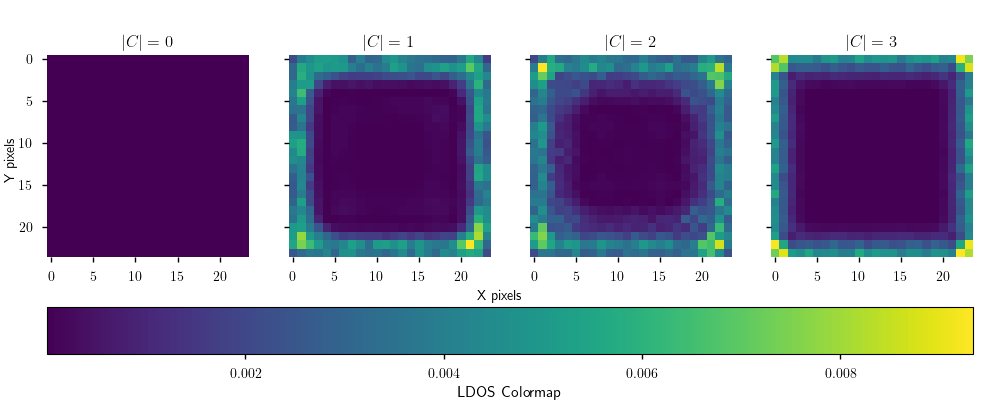

In [222]:
aux.get_figure_repr_1(X_train)

We can now clean the test data from the unnecesary columns, and split it in data and labels

In [223]:
X_test = X_test.loc[:, ["LDOS","Chern_bulk"]]
X_test, Y_test = X_test["LDOS"], X_test["Chern_bulk"]

Now we can split the training data into real training dataset and validation dataset, along with splitting the labels

In [224]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train["LDOS"], X_train["Chern_bulk"], shuffle=True, test_size=0.2)

We can check dimensionality just in case

In [225]:
print("Shapes of X_train data: {}, Y_train labels: {}".format(X_train.shape, Y_train.shape))
print("Shapes of X_test data: {}, Y_test labels: {}".format(X_test.shape, Y_test.shape))
print("Shapes of X_val data: {}, Y_val labels: {}".format(X_val.shape, Y_val.shape))

Shapes of X_train data: (25975,), Y_train labels: (25975,)
Shapes of X_test data: (8557,), Y_test labels: (8557,)
Shapes of X_val data: (6494,), Y_val labels: (6494,)


Now let's normalize the data

In [252]:
maxValue = np.amax([np.amax(arr) for arr in X_train])

print("Maximum value in training data:",maxValue)

X_train = np.divide(X_train, maxValue)
X_val = np.divide(X_val, maxValue)
X_test = np.divide(X_test, maxValue)

Maximum value in training data: 0.4406520127206641


In [255]:
X_train = pd.DataFrame(X_train)

In [256]:
X_train = tf.convert_to_tensor(X_train)
X_val = tf.convert_to_tensor(X_val)
X_test = tf.convert_to_tensor(X_test)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type numpy.ndarray).

And **NOW** we can get into creating and training a CNN model

## Setting up a CNN model

In [228]:
def getModelWithRegularisation(
        nFilters,
        kernel_size,
        pool_size,
        nNeurons,
        nHiddenLayers,
        dropout_rate,
        l2_lambda,
        inputShape,
        outputWidth,
):
    inputs = tf.keras.Input(shape=inputShape)
    x = inputs
    x = (tf.keras.layers.Rescaling(1.0 / 255))(x)
    for iHidden in range(nHiddenLayers):
        x = tf.keras.layers.Conv2D(
            filters=nFilters,
            kernel_size=kernel_size,
            kernel_regularizer=tf.keras.regularizers.l2(l2_lambda),
        )(x)
        #         x = tf.keras.layers.BatchNormalization()(x)
        x = tf.keras.activations.relu(x)
        x = tf.keras.layers.Dropout(dropout_rate)(x)
        x = tf.keras.layers.MaxPooling2D(pool_size=pool_size)(x)

    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(
        nNeurons,
        activation=tf.nn.relu,
        kernel_regularizer=tf.keras.regularizers.l2(l2_lambda),
    )(x)
    outputs = tf.keras.layers.Dense(outputWidth, activation=tf.nn.softmax)(x)
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    model.compile(
        loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"]
    )
    return model

In [235]:
verb=1
dropout_rate = 0.5
l2_lambda = 0.001
epochs = 65
batch_size = 128
nFilters = 32
kernel_size = 3
pool_size = (2,2)
nNeurons = 128
nHiddenLayers = 1
inputShape = (100, 100, 1)
outputWidth = 3

In [260]:
%%time

model_primo = getModelWithRegularisation(nFilters, kernel_size, pool_size, nNeurons, nHiddenLayers, dropout_rate, l2_lambda, inputShape, outputWidth)

model_primo_fit = model_primo.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, Y_val), verbose=verb, use_multiprocessing=True, validation_split=0.15, callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)])

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type numpy.ndarray).

In [259]:
aux.plotTrainingHistory(model_primo_fit)
aux.printScores(model_primo, X_val,  Y_val)
aux.plotHistScores(model_primo, X_val,  Y_val)
ROC_1 = aux.roc_auc(model_primo, X_val,  Y_val, title="ROC characteristic")

NameError: name 'model_primo_fit' is not defined

# Code linting

In [226]:
!black Raw_Data

All done! ✨ 🍰 ✨
11 files left unchanged.


In [227]:
!black auxiliary_funcs.py

All done! ✨ 🍰 ✨
1 file left unchanged.
